In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import statistics
%matplotlib inline

# 1.Загрузить файл hr.csv

In [100]:
df = pd.read_csv("HR.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [4]:
import pandas_profiling

In [5]:
df.profile_report()

In [16]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
print(df[df["average_montly_hours"]==135].iloc[:,:1].count(),
      df[df["average_montly_hours"]==156].iloc[:,:1].count())

# В average_montly_hours две моды

satisfaction_level    153
dtype: int64 satisfaction_level    153
dtype: int64


# 3.Рассчитать и визуализировать корреляционную матрицу для переменных

In [35]:
corr_matrix = df.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


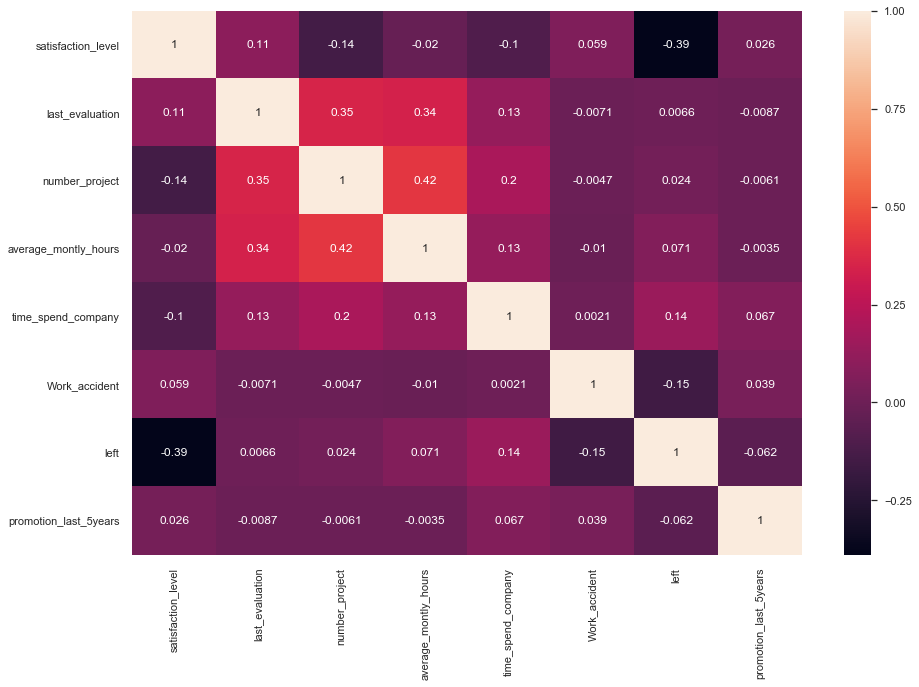

In [36]:
sns.set(rc=({'figure.figsize':(15, 10)}))
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)

# 4.Визуализировать несколько взаимосвязей между переменными

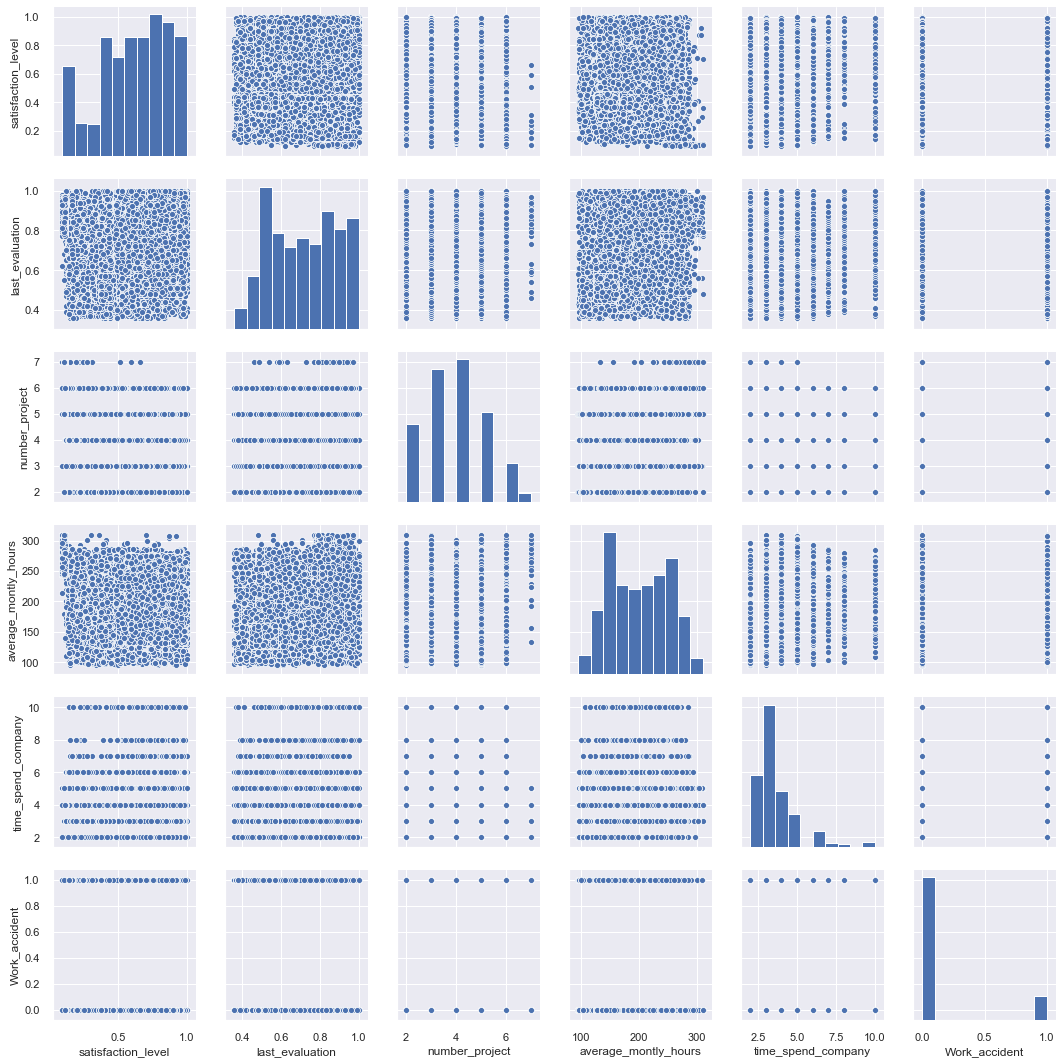

In [37]:
sns.pairplot(df, vars=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
                       'time_spend_company', 'Work_accident'], kind="scatter")

# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными

H0: У людей с происшествиями на работе и без них уровень удовлетворенности не отличается

In [62]:
noa_satlevel = df[df['Work_accident']==0]['satisfaction_level']
a_satlevel = df[df['Work_accident']==0]['satisfaction_level']

In [63]:
len(noa_satlevel), len(a_satlevel)

(12830, 12830)

In [64]:
statistics.variance(noa_satlevel), statistics.variance(a_satlevel)

(0.06298735934642911, 0.06298735934642911)

In [68]:
sts.ttest_ind(noa_satlevel, a_satlevel, equal_var=True)

#pvalue больше альфа-ошибки, значит не можем отклонить нулевую гипотезу, статистического различия нет

Ttest_indResult(statistic=0.0, pvalue=1.0)

H0: У людей с низкой и высокой зарплатой уровень удовлетворенности не отличается

In [71]:
lslevel = df[df['salary']=='low']['satisfaction_level']
hslevel = df[df['salary']=='high']['satisfaction_level']

len(lslevel), len(hslevel)

(7316, 1237)

In [72]:
lslevel = lslevel.sample(1200)
hslevel = hslevel.sample(1200)

In [74]:
statistics.variance(lslevel), statistics.variance(hslevel)

(0.06487889880455935, 0.05124569113149847)

In [76]:
sts.ttest_ind(lslevel, hslevel, equal_var=False)

#pvalue меньше 0.05, значит нулевую гипотезу отклоняем

Ttest_indResult(statistic=-3.7171826309013527, pvalue=0.00020613305102865892)

H0: У сотрудников отдела продаж и IT количество проектов не отличается

In [77]:
sdept = df[df['sales']=='sales']['number_project']
itdept = df[df['sales']=='IT']['number_project']

len(sdept), len(itdept)

(4140, 1227)

In [78]:
sdept = sdept.sample(1200)
itdept = itdept.sample(1200)

In [80]:
statistics.variance(sdept), statistics.variance(itdept)

(1.5949513483458437, 1.4754962468723936)

In [82]:
sts.ttest_ind(sdept, itdept, equal_var=False)

#pvalue больше альфа-ошибки, значит не можем отклонить нулевую гипотезу, статистического различия нет

Ttest_indResult(statistic=-0.9225641179934608, pvalue=0.3563273538890521)

# 6.Рассчитать сколько работников работает в каждом департаменте

In [83]:
departments = df["sales"].unique().tolist()
results = {}

for department in departments:
    results.update({department:len(df[df["sales"]==department])})
    
results

{'sales': 4140,
 'accounting': 767,
 'hr': 739,
 'technical': 2720,
 'support': 2229,
 'management': 630,
 'IT': 1227,
 'product_mng': 902,
 'marketing': 858,
 'RandD': 787}

# 7.Показать распределение сотрудников по зарплатам

In [101]:
df['salary2'] = df['salary']
df['salary2'].replace(to_replace=['low', 'medium', 'high'], value=[1, 2, 3], inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary2
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


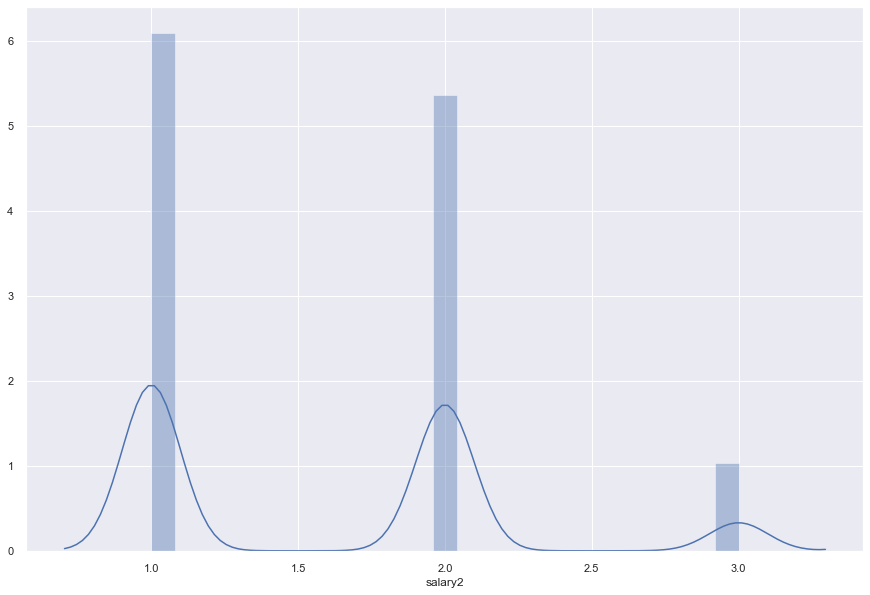

In [104]:
sns.distplot(df['salary2'])

# 8.Показать распределение сотрудников по зарплатам совместно с департаментами

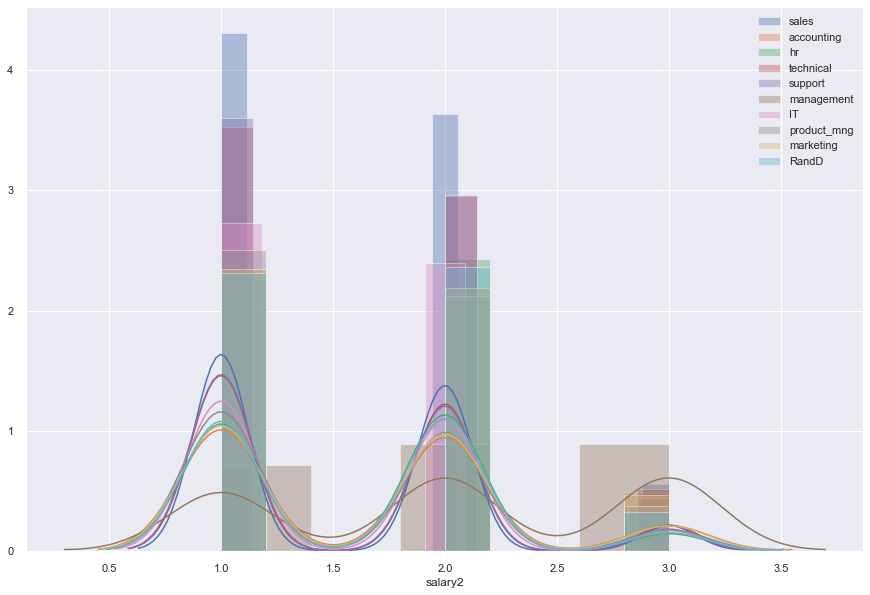

In [103]:
dlist = list(results.keys())

sales = df[df["sales"]==dlist[0]]["salary2"]
accounting = df[df["sales"]==dlist[1]]["salary2"]
hr = df[df["sales"]==dlist[2]]["salary2"]
technical = df[df["sales"]==dlist[3]]["salary2"]
support = df[df["sales"]==dlist[4]]["salary2"]
management = df[df["sales"]==dlist[5]]["salary2"]
IT = df[df["sales"]==dlist[6]]["salary2"]
product_mng = df[df["sales"]==dlist[7]]["salary2"]
marketing = df[df["sales"]==dlist[8]]["salary2"]
RandD = df[df["sales"]==dlist[9]]["salary2"]

sns.distplot(sales)
sns.distplot(accounting)
sns.distplot(hr)
sns.distplot(technical)
sns.distplot(support)
sns.distplot(management)
sns.distplot(IT)
sns.distplot(product_mng)
sns.distplot(marketing)
sns.distplot(RandD)

plt.legend(dlist)
plt.show()

# 9.Сколько сотрудников покинули компанию

In [60]:
len(df[df['left']==1])

3571

# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

H0: Уровень зп не влияет на то, как сотрудники покидают компанию

In [105]:
lows = df[df['salary']=='low']['left']
notlows = df[df['salary']!='low']['left']

len(lows), len(notlows)

(7316, 7683)

In [108]:
lows = lows.sample(7000)
notlows = notlows.sample(7000)

In [110]:
statistics.variance(lows), statistics.variance(notlows)

(0.20893676647684364, 0.14953236176596654)

In [111]:
sts.ttest_ind(lslevel, hslevel, equal_var=False)

Ttest_indResult(statistic=-3.7171826309013527, pvalue=0.00020613305102865892)

<FONT color='green'>Сотрудники покидают компанию из-за низких зарплат</FONT>

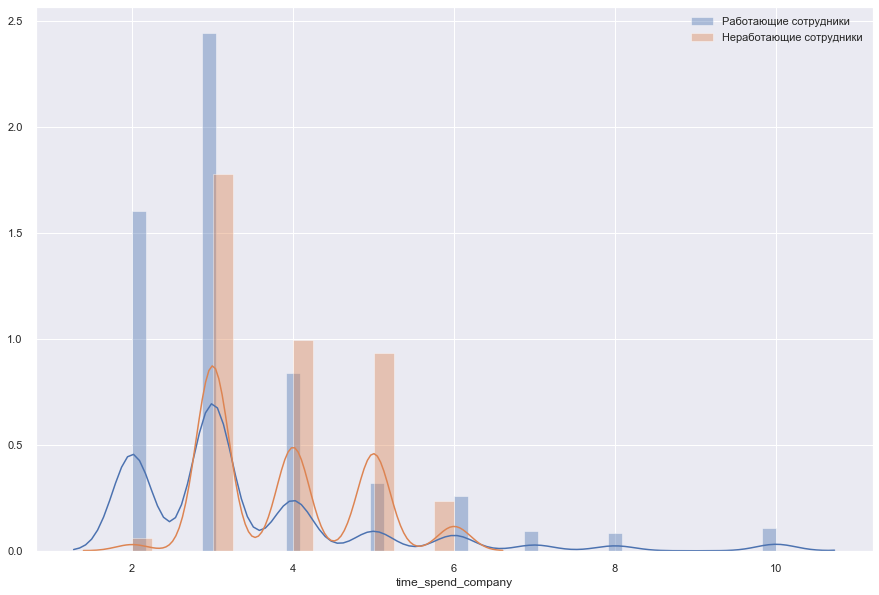

In [116]:
tscstay = df[df['left']==0]['time_spend_company']
tscleft = df[df['left']==1]['time_spend_company']

sns.distplot(tscstay)
sns.distplot(tscleft)

plt.legend(['Работающие сотрудники', 'Неработающие сотрудники'])
plt.show()

<FONT color='green'>В основном люди увольняются после 3х лет - вероятно нужно планировать их рост, улучшение условий, индексацию и т.д. к этому моменту</FONT>

H0: Повышения не влияют на решение сотрудников уволиться

In [120]:
promoted = df[df['left']==0]['promotion_last_5years']
notpromoted = df[df['left']==1]['promotion_last_5years']

len(promoted), len(notpromoted)

(11428, 3571)

In [121]:
promoted = promoted.sample(3500)
notpromoted = notpromoted.sample(3500)

In [122]:
statistics.variance(promoted), statistics.variance(notpromoted)

(0.02695390519740334, 0.005400645082268403)

In [123]:
sts.ttest_ind(lslevel, hslevel, equal_var=False)

Ttest_indResult(statistic=-3.7171826309013527, pvalue=0.00020613305102865892)

<FONT color='green'>Повышения взаимосвязаны с количеством увольнений</FONT>